In [53]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
from tqdm import trange,tqdm,notebook
import seaborn as sns

font = {        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)

import pandas as pd
import CANDY
import os
import imageio
import time
import scipy as sp

In [37]:
def oops(foo,bar='bar',**kwargs):
    print(foo + bar)
    for key,value in kwargs.items():
        print('the value for {0} is {1}'.format(key,value))
    print(kwargs)
    if len(kwargs) > 0:
        print('checking for specifically ', kwargs['name'])

In [50]:
kwargs={'name':'horro'}
oops('haha ')
oops('ok, ',**kwargs,bar='sum')

haha bar
{}
ok, sum
the value for name is horro
{'name': 'horro'}
checking for specifically  horro


In [41]:
ok = {'name':'sean','surname':'bean'}

In [47]:
if 'age' not in ok:
    ok['age'] = 44
print(ok)

{'name': 'sean', 'surname': 'bean', 'age': 44}


In [55]:
N = 20
T = int(5*N*(N-1)/2)
runs = 100
C = 15
payoffs=np.zeros((runs,T+1))

for r in trange(runs):
#     g1 = nx.complete_graph(C)
#     g1.add_nodes_from(range(C,N))
#     nx.set_node_attributes(g1,{n:int(n<C) for n in range(N)},'C')

    g1 = nx.generators.random_graphs.barabasi_albert_graph(N,3)
    cooperate = np.random.choice(range(N),size=C,replace=False)
    nx.set_node_attributes(g1,{n:int(n in cooperate) for n in range(N)},'C')

    payoffs[r,:] = evolve(g1,T,strat_step=CANDY.pairwise_comparison,zeta=1,eta=2).mean(axis=0)

  0%|          | 0/100 [00:00<?, ?it/s]/home/jbara/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jbara/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jbara/Documents/Warwick/PhD/Code/CANDY.py:72: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(beta*(float(p_j-p_i))))
100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


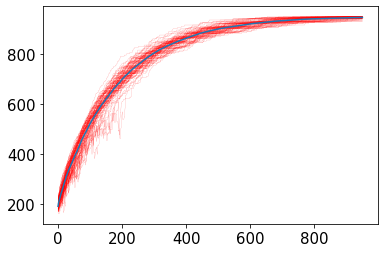

In [56]:
for r in range(runs):
    plt.plot(payoffs[r,:],lw=0.1,c='r')
    
plt.plot(payoffs.mean(axis=0))